In [1]:
from ModelSchema.NeuralNetWork import dataset, train_and_test, model

import os
from torch.utils.data import DataLoader
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models
from torchinfo import summary


test = dataset.SpectraDataset('../database/spectras/test')
loader_test = DataLoader(test, batch_size= 1, pin_memory= True, shuffle=True)


In [2]:
x , y, interferogram  = test[5]

/home/alexandre/Área de trabalho/LineProphet-Machine-Learning-for-Spectral-Attributes/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alexandre/Área de trabalho/LineProphet-Machine-Learning-for-Spectral-Attributes/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


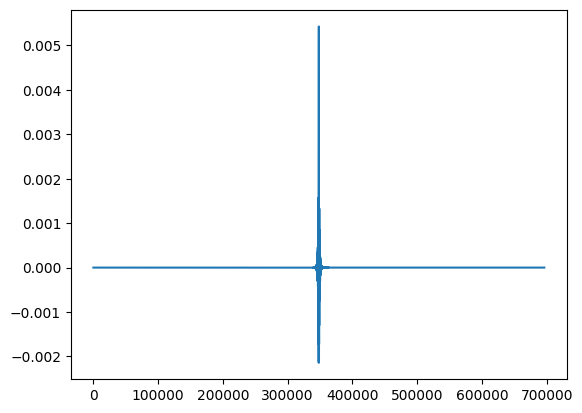

In [3]:
plt.plot(interferogram)

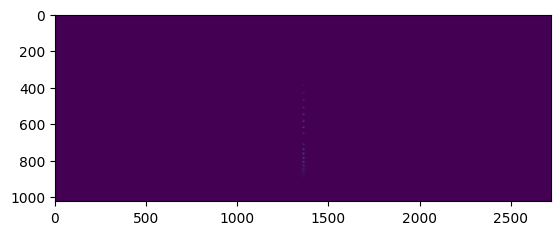

In [5]:
plt.imshow(x.squeeze(0))

In [14]:
model = models.get_model('mobilenet_v2',weights = 'MobileNet_V2_Weights.IMAGENET1K_V2')

In [16]:
model = model.ConvolutionalNet()

AttributeError: 'MobileNetV2' object has no attribute 'ConvolutionalNet'

In [9]:
model

ConvolutionalNet(
  (adaptador): Conv2d(1, 3, kernel_size=(4, 4), stride=(1, 1))
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0

In [10]:
for name, params in model.named_parameters():
    print(name, params.requires_grad)

adaptador.weight True
adaptador.bias True
base_model.features.0.0.weight False
base_model.features.0.1.weight False
base_model.features.0.1.bias False
base_model.features.1.conv.0.0.weight False
base_model.features.1.conv.0.1.weight False
base_model.features.1.conv.0.1.bias False
base_model.features.1.conv.1.weight False
base_model.features.1.conv.2.weight False
base_model.features.1.conv.2.bias False
base_model.features.2.conv.0.0.weight False
base_model.features.2.conv.0.1.weight False
base_model.features.2.conv.0.1.bias False
base_model.features.2.conv.1.0.weight False
base_model.features.2.conv.1.1.weight False
base_model.features.2.conv.1.1.bias False
base_model.features.2.conv.2.weight False
base_model.features.2.conv.3.weight False
base_model.features.2.conv.3.bias False
base_model.features.3.conv.0.0.weight False
base_model.features.3.conv.0.1.weight False
base_model.features.3.conv.0.1.bias False
base_model.features.3.conv.1.0.weight False
base_model.features.3.conv.1.1.weight

In [15]:
summary(model)

Layer (type:depth-idx)                             Param #
MobileNetV2                                        --
├─Sequential: 1-1                                  --
│    └─Conv2dNormActivation: 2-1                   --
│    │    └─Conv2d: 3-1                            864
│    │    └─BatchNorm2d: 3-2                       64
│    │    └─ReLU6: 3-3                             --
│    └─InvertedResidual: 2-2                       --
│    │    └─Sequential: 3-4                        896
│    └─InvertedResidual: 2-3                       --
│    │    └─Sequential: 3-5                        5,136
│    └─InvertedResidual: 2-4                       --
│    │    └─Sequential: 3-6                        8,832
│    └─InvertedResidual: 2-5                       --
│    │    └─Sequential: 3-7                        10,000
│    └─InvertedResidual: 2-6                       --
│    │    └─Sequential: 3-8                        14,848
│    └─InvertedResidual: 2-7                       --
│    │ 

In [2]:
model = torch.load('models/convolutionalnet.pth')

/tmp/ipykernel_50047/774777495.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('models/convolutionalnet.pth')


In [15]:
X , env = test[int(np.random.uniform(0,200))]
print(X)
model.eval()
with torch.no_grad():
    pred = model(X.unsqueeze(0))

tensor([[[-109.9882, -109.9974, -109.9997,  ..., -109.9988, -109.9910,
          -109.9956],
         [-109.9883, -109.9974, -109.9911,  ..., -109.9904, -109.9906,
          -109.9956],
         [-109.9898, -109.9974, -109.9886,  ..., -109.9878, -109.9913,
          -109.9958],
         ...,
         [-110.0000, -110.0000, -110.0000,  ..., -110.0000, -110.0000,
          -110.0000],
         [-110.0000, -110.0000, -110.0000,  ..., -110.0000, -110.0000,
          -110.0000],
         [-110.0000, -110.0000, -110.0000,  ..., -110.0000, -110.0000,
          -110.0000]]])


In [16]:
env[0] - pred[0][0],  env[1] - pred[0][1]

(tensor(-0.6519), tensor(0.4285))

In [5]:
env[0] , pred[0][0]

(tensor(0.2283), tensor(1.6164))

In [17]:
env[0] *(400-250) + 250 , pred[0][0]*(400-250) + 250

(tensor(399.8198), tensor(497.6096))

In [17]:
env[1] , pred[0][1]

(tensor(0.2360), tensor(0.5185))

In [18]:
env[1] * (0.8 - 0.01) + 0.01 , pred[0][1]* (0.8 - 0.01) + 0.01

(tensor(0.5117), tensor(0.1732))

In [1]:
import numpy as np

In [42]:
temperatures = np.random.uniform(273.15,373.15, 200)

pressures = np.random.uniform(0.01,1, 200)



In [43]:
temperatures[1], pressures[1]

(np.float64(297.7244793413202), np.float64(0.5007531332135272))

In [44]:
envs = np.array(list(zip(temperatures, pressures)))

In [45]:
np.savetxt('test.txt',envs)